## This ia a hypothesis testing project using python libraries.

#  Data analysis for a taxi company
## Punyatoya Behera

## Import Python libraries

In [ ]:
import pandas as pd  # Importing appropriate libraries
import seaborn as sns
from scipy import stats

## Load data

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/codymbaldwin/sample-files/master/taxis.csv") # Loading csv file into dataset

## Data Exploration

In [ ]:
df.shape  # calculating dimensions

(584, 8)

In [ ]:
df.info() # checking columns and their datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          584 non-null    int64  
 1   passengers  584 non-null    int64  
 2   color       584 non-null    object 
 3   distance    584 non-null    float64
 4   fare        584 non-null    float64
 5   tip         584 non-null    float64
 6   tolls       584 non-null    float64
 7   total       584 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 36.6+ KB


In [ ]:
df.head()  # Preview first few columns

,id,passengers,color,distance,fare,tip,tolls,total
0,1,1,green,0.72,5.5,1.11,0.0,7.56
1,2,3,yellow,2.16,10.0,2.88,0.0,15.80
2,3,1,green,0.15,7.0,2.19,0.0,8.40
3,4,3,yellow,7.35,22.5,5.38,0.0,27.30
4,5,1,green,3.44,12.5,3.35,0.0,15.96


In [ ]:
df.describe() # checking descriptive stats for numerical columns

,id,passengers,distance,fare,tip,tolls,total
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,292.500000,1.446918,2.333699,10.687500,2.651558,0.053836,15.912483
std,168.730554,1.126900,2.038913,6.368975,1.364825,0.541843,7.891350
min,1.000000,0.000000,0.000000,3.000000,0.060000,0.000000,4.810000
25%,146.750000,1.000000,1.000000,6.500000,1.697500,0.000000,10.380000
50%,292.500000,1.000000,1.595000,8.500000,2.580000,0.000000,13.555000
75%,438.250000,1.000000,3.012500,13.125000,3.530000,0.000000,19.560000
max,584.000000,6.000000,13.900000,50.000000,7.730000,5.760000,57.800000


# Data Segmentation

In [ ]:
df_taxi_yellow = df[df["color"] == "yellow"] # dataframe for yellow taxi
df_taxi_yellow.tail()

,id,passengers,color,distance,fare,tip,tolls,total
575,576,2,yellow,2.09,10.5,3.24,0.0,16.56
577,578,4,yellow,2.52,10.0,3.08,0.0,14.30
579,580,2,yellow,1.19,6.5,1.81,0.0,11.80
581,582,1,yellow,4.69,15.0,3.94,0.0,21.96
583,584,6,yellow,1.28,7.5,2.26,0.0,12.96


In [ ]:
df_taxi_green = df[df["color"] == "green"] # dataframe for green taxi
df_taxi_green.head()

,id,passengers,color,distance,fare,tip,tolls,total
0,1,1,green,0.72,5.5,1.11,0.0,7.56
2,3,1,green,0.15,7.0,2.19,0.0,8.40
4,5,1,green,3.44,12.5,3.35,0.0,15.96
6,7,1,green,1.77,14.0,3.45,0.0,19.75
8,9,1,green,8.26,26.0,5.39,0.0,36.66


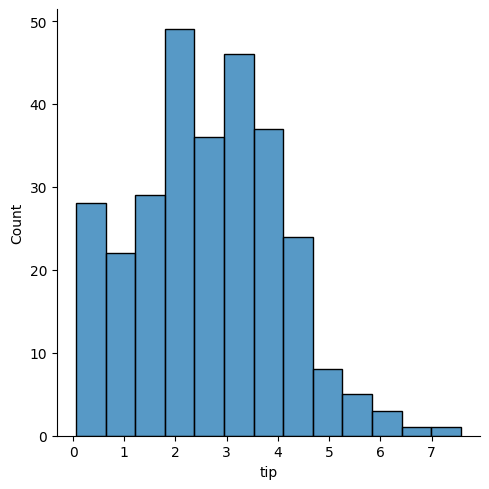

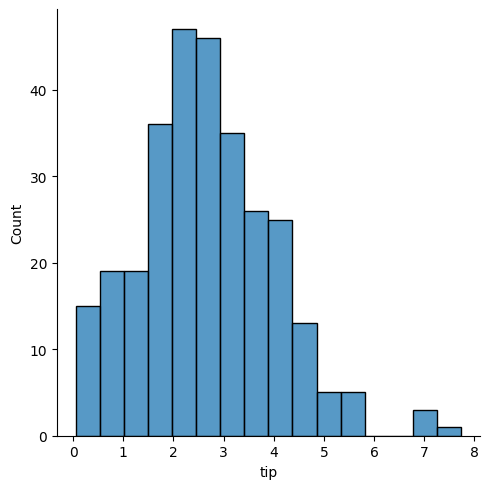

In [ ]:
sns.displot(df_taxi_yellow['tip']); # Plot distribution of tips for yellow color of taxi
sns.displot(df_taxi_green['tip']);  # Plot distribution of tips for green color of taxi

# Perform a normality test

In [ ]:
x = df_taxi_yellow["tip"] # Put each field in the dataframe into its own variable
y = df_taxi_green["tip"]
print(stats.normaltest(x)) # conduct normality test for each
print(stats.normaltest(y))

NormaltestResult(statistic=np.float64(3.64258187700985), pvalue=np.float64(0.16181672060489052))
NormaltestResult(statistic=np.float64(18.463276952811235), pvalue=np.float64(9.789270985641703e-05))


# Test for equal variance

In [ ]:
stats.bartlett(x,y) # conduct bartlett test

BartlettResult(statistic=np.float64(0.7714482981698573), pvalue=np.float64(0.37976938229166823))

# Perform a 2-sample t-test

In [ ]:
stats.ttest_ind(x,y) # conduct 2-sample t-test

TtestResult(statistic=np.float64(0.04542243544132782), pvalue=np.float64(0.9637861790300399), df=np.float64(582.0))